In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp
from scipy import stats
print (sns.__version__)
from caveclient import CAVEclient
from datetime import datetime, timezone
settime3 = datetime(2023, 9, 19, 4, 0, 0, 0, tzinfo=timezone.utc)
client = CAVEclient('minnie65_phase3_v1')

0.13.0


In [7]:
# ########Read in data from Gouwens & Sorensen et al., 2020
# ########Read in cell type ids for each predicted MET-type

##get ids for curated em cells
cg_ids = [864691135969447781, 864691136118647832,864691136116457636,864691136238652476,864691136618564493,864691136195284556,864691135785592004, 864691135572082925, 864691135544588584, 864691135577202181, 864691135699487522, 864691135404765166, 864691135013417622,864691135341516741, 864691135118298333, 864691135697251738]

### Read in morpho features from Gouwens & Sorensen et al., 2020 and EM MC features & merge into one df
ivscc_features = pd.read_csv(r"C:\Users\clare.gamlin\Documents\CG_EM_paper\EM_MC_paper_figures-main-10092023\EM_MC_paper_figures-main\IVSCC_Inhib_features_11_22_23_RawFeatureWide.csv")
ivscc_labels = pd.read_csv(r"C:\Users\clare.gamlin\Documents\CG_EM_paper\Feature_csvs\RawFeatureWide\IVSCC_RawFeatureWide_Labels.csv")
ivscc_labels_short = ivscc_labels[['Tree_call_label','specimen_id', 'MET-type Label']]
ivscc_feature_labels = pd.merge(ivscc_features, ivscc_labels_short, on = 'specimen_id')
em_features = pd.read_csv(r"C:\Users\clare.gamlin\Documents\CG_EM_paper\EM_MC_paper_figures-main-10092023\EM_MC_paper_figures-main\173_inhib_column_paper_RawFeatureWide_resamp_1550.csv")

# em_features = pd.read_csv("./EM_MC_features/big_batch_v1/11_18_22_RawFeatureWide.csv")
ivscc_merged = ivscc_feature_labels[ivscc_feature_labels['Tree_call_label']!="PoorQ"].copy()
ivscc_merged_nonull = ivscc_merged[~ivscc_merged['MET-type Label'].isnull()]
ivscc_merged_nonull_nols5 = ivscc_merged_nonull[~ivscc_merged_nonull['MET-type Label'].isin(['Pvalb-MET-5','Vip-MET-3', 'Sst-MET-11', 'Sncg-MET-2', 'Sncg-MET-3', 'Lamp5-MET-2'])].copy()
ivscc_merged_nonull_nols5["method"] = 1
# test_df =  ivscc_merged.loc[ivscc_merged['specimen_id'] == 966835644]
print (ivscc_merged_nonull_nols5.shape)


# em_merged = em_features.merge(em_labels_11, left_on = 'specimen_id', right_on= 'id')
em_merged = em_features.rename(columns = {'predicted_MET-type Label':'MET-type Label'})
em_merged["method"] = 2
###label datasets by technique used to collect
ivscc_merged_nonull_nols5["Tech"] = "PS"
em_merged["Tech"] = "EM"
ivscc_merged_nonull_nols5["Tech_2"] = "PS"
em_merged["Tech_2"] = "EM"
# print (em_merged)

features_concat = pd.concat([em_merged, ivscc_merged_nonull_nols5], ignore_index = True, sort = False)
##exclude features not measured in EM
features_concat = features_concat.drop(columns = ['basal_dendrite_mean_diameter', 'basal_dendrite_total_surface_area','soma_surface_area'])
for i in cg_ids:
    features_concat.loc[features_concat['specimen_id'] == i, ["Tech"]] = "Curated"
features_concat_cur = features_concat.loc[features_concat["Tech"] == "Curated"]
feature_cur_short = features_concat_cur[['specimen_id','MET-type Label']]
print (features_concat.head())

#just column cells
# # print (features_concat.head())
# feature_concat_column = features_concat.loc[features_concat["Tech"] == "Curated"]
# print (feature_concat_column.head())
# print (feature_concat_column.tail())

(477, 50)
          specimen_id  axon_bias_x  axon_bias_y  axon_depth_pc_0  \
0  864691134886015738    30.543661   205.109734      -376.954802   
1  864691134886016762    22.052435   282.297455       554.558790   
2  864691134948652540    45.281903   205.486565      -188.776418   
3  864691135013417622   176.285047   212.444276       399.467144   
4  864691135013445270    13.610038   -38.628431        88.089221   

   axon_depth_pc_1  axon_depth_pc_2  axon_depth_pc_3  axon_depth_pc_4  \
0       -79.557169       390.029422       266.139752       386.134375   
1      -724.452001      -835.528109      1055.718191       536.165176   
2       -91.479535      -291.401901      -412.612517       858.741308   
3       397.062043       -48.454492       382.915224       302.973521   
4      -238.898790      -540.380667       208.754906       431.081533   

   axon_emd_with_basal_dendrite  axon_exit_distance  ...  \
0                     19.670603            0.000000  ...   
1                     

(650, 48)
Empty DataFrame
Columns: [axon_bias_x, axon_bias_y, axon_depth_pc_0, axon_depth_pc_1, axon_depth_pc_2, axon_depth_pc_3, axon_depth_pc_4, axon_emd_with_basal_dendrite, axon_exit_distance, axon_exit_theta, axon_extent_x, axon_extent_y, axon_frac_above_basal_dendrite, axon_frac_below_basal_dendrite, axon_frac_intersect_basal_dendrite, axon_max_branch_order, axon_max_euclidean_distance, axon_max_path_distance, axon_mean_contraction, axon_num_branches, axon_soma_percentile_x, axon_soma_percentile_y, axon_total_length, basal_dendrite_bias_x, basal_dendrite_bias_y, basal_dendrite_calculate_number_of_stems, basal_dendrite_extent_x, basal_dendrite_extent_y, basal_dendrite_frac_above_axon, basal_dendrite_frac_below_axon, basal_dendrite_frac_intersect_axon, basal_dendrite_max_branch_order, basal_dendrite_max_euclidean_distance, basal_dendrite_max_path_distance, basal_dendrite_mean_contraction, basal_dendrite_num_branches, basal_dendrite_soma_percentile_x, basal_dendrite_soma_percentile_

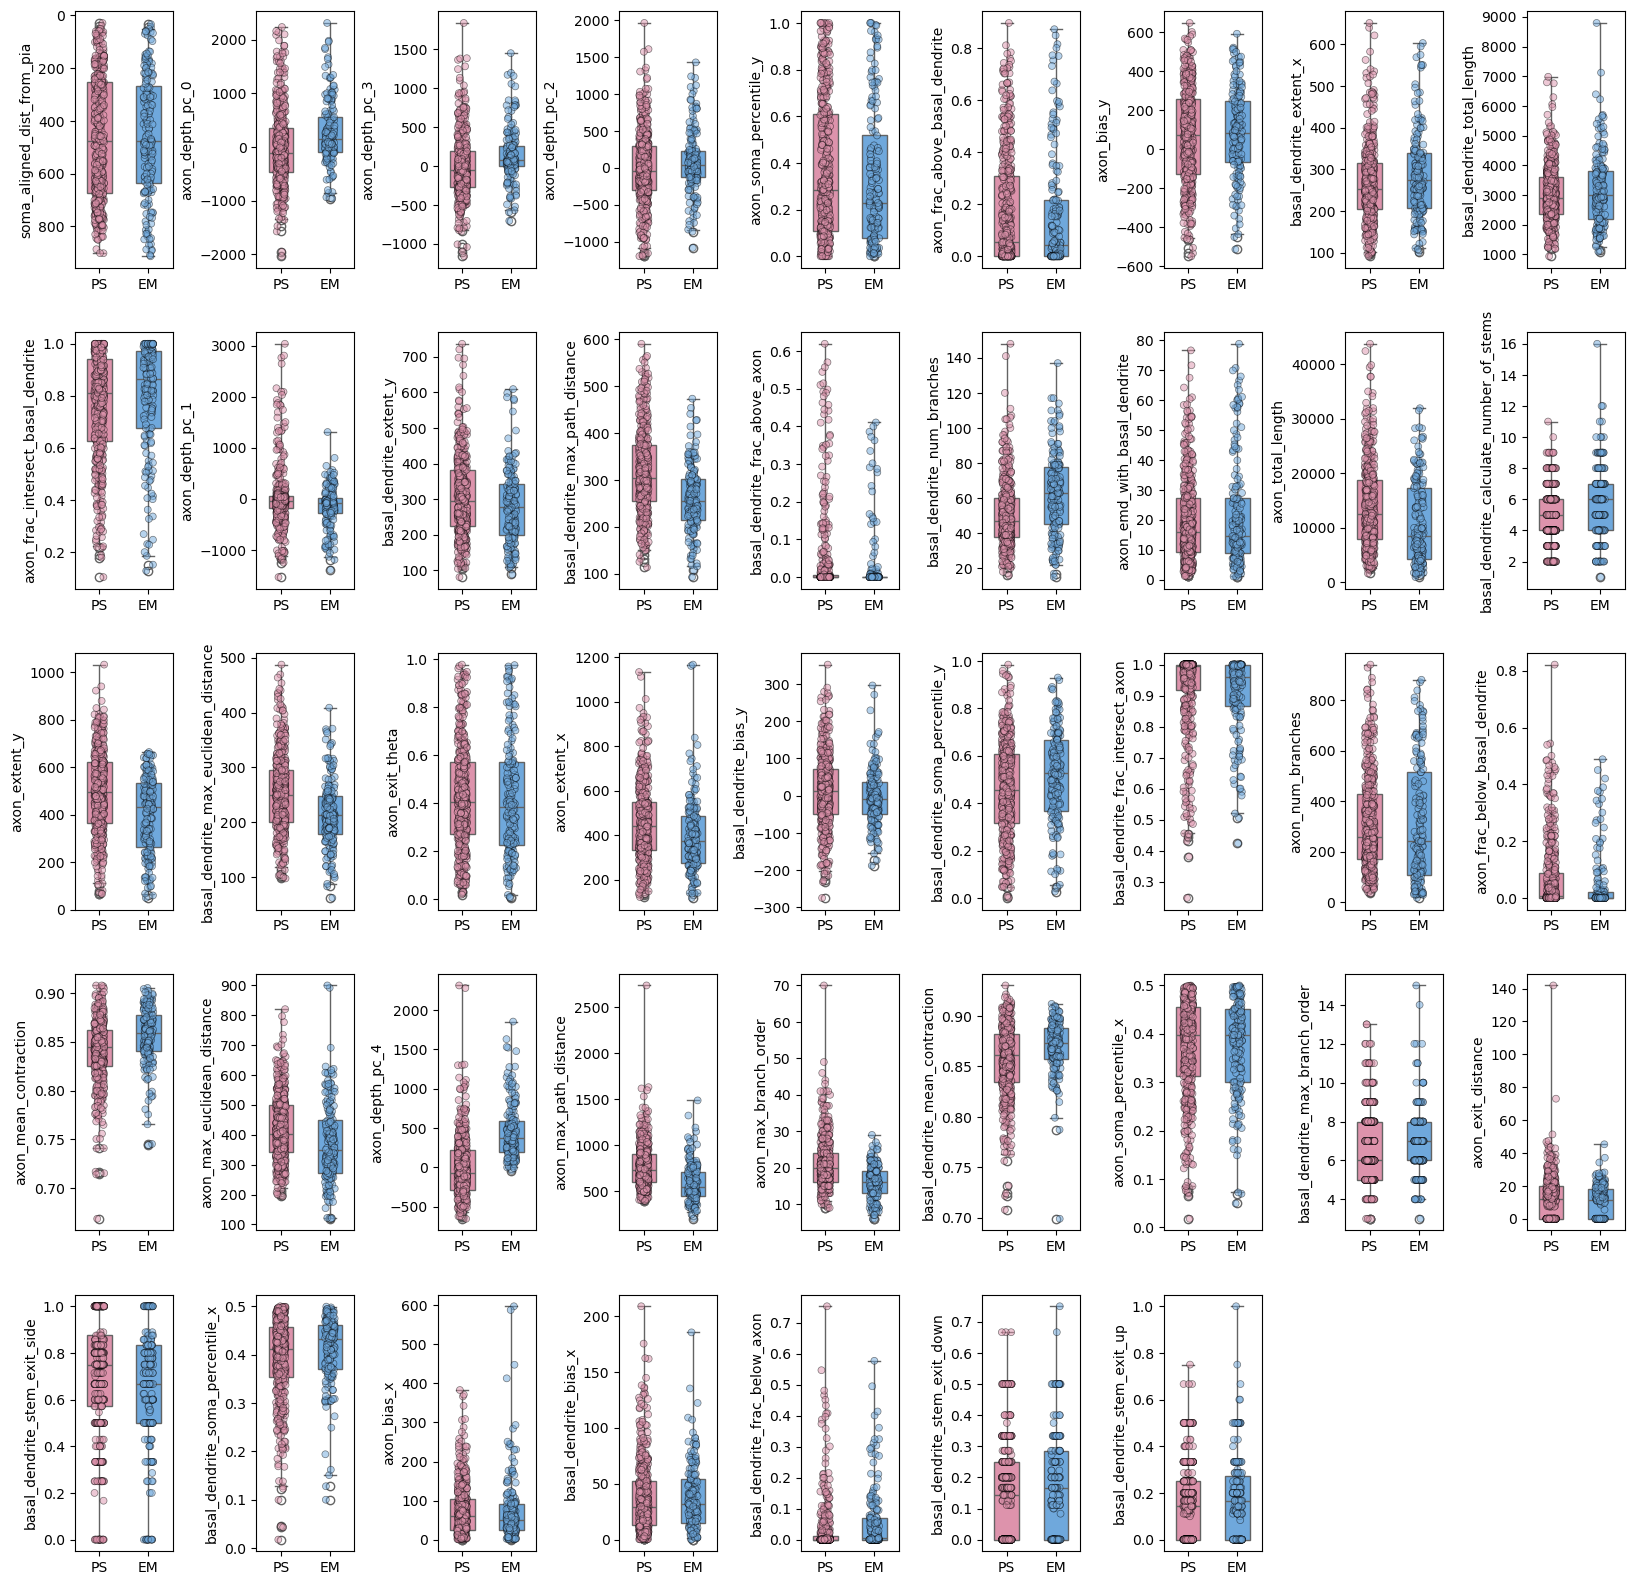

In [8]:
###plot patchseq vs EM
features_concat_minus = features_concat.drop(columns = ['specimen_id'])
features_concat_minus = features_concat_minus.sort_values(by=['Tech'], ascending = False).copy()

print (features_concat_minus.shape)

sst_features = features_concat_minus[features_concat_minus["MET-type Label"].str.contains('Sst', na = False)].copy()
sst_features['Tech_2'] = sst_features['Tech_2'].str.replace('PS', 'SST PS ')
sst_features['Tech_2'] = sst_features['Tech_2'].str.replace('EM', 'SST EM ')

# print (sst_features.shape)
# print (sst_features.tail(15))


sst_features_cur = sst_features[sst_features["Tech"].str.contains('Curated', na = False)].copy()
# print (sst_features_cur.shape)

plt.figure(figsize = (20,20))
plt.subplots_adjust(hspace = 0.25)
plt.subplots_adjust(wspace = 0.85)


#by gini index
column_list = ['soma_aligned_dist_from_pia',
'axon_depth_pc_0',
'axon_depth_pc_3',
'axon_depth_pc_2',
'axon_soma_percentile_y',
'axon_frac_above_basal_dendrite',
'axon_bias_y',
'basal_dendrite_extent_x',
'basal_dendrite_total_length',
'axon_frac_intersect_basal_dendrite',
'axon_depth_pc_1',
'basal_dendrite_extent_y',
'basal_dendrite_max_path_distance',
'basal_dendrite_frac_above_axon',
'basal_dendrite_num_branches',
'axon_emd_with_basal_dendrite',
'axon_total_length',
'basal_dendrite_calculate_number_of_stems',
'axon_extent_y',
'basal_dendrite_max_euclidean_distance',
'axon_exit_theta',
'axon_extent_x',
'basal_dendrite_bias_y',
'basal_dendrite_soma_percentile_y',
'basal_dendrite_frac_intersect_axon',
'axon_num_branches',
'axon_frac_below_basal_dendrite',
'axon_mean_contraction',
'axon_max_euclidean_distance',
'axon_depth_pc_4',
'axon_max_path_distance',
'axon_max_branch_order',
'basal_dendrite_mean_contraction',
'axon_soma_percentile_x',
'basal_dendrite_max_branch_order',
'axon_exit_distance',
'basal_dendrite_stem_exit_side',
'basal_dendrite_soma_percentile_x',
'axon_bias_x',
'basal_dendrite_bias_x',
'basal_dendrite_frac_below_axon',
'basal_dendrite_stem_exit_down',
'basal_dendrite_stem_exit_up']

print (features_concat_minus.shape)
set2_new_palette ={"PS": "#dd93ac", "EM": "#6fa8dc", "SST PS ": "#ea9999", "SST EM ": "#9fc5e8", "Curated":"#b4a7d6"}
i = 0
for n in column_list:

#     print (n)
    afont = {'fontname': 'arial'}
#     order = ['SST PS ', 'SST EM ', 'Curated']
    order = ['PS', 'EM']

    ax = plt.subplot(5,9, i+1)

  
    #all inhib
    sns.boxplot(x= "Tech_2", y = n, hue = "Tech_2", data = features_concat_minus, saturation = 1, width = 0.5, whis = [1,100],  order = order, palette = set2_new_palette, ax = ax)
    sns.stripplot(x= "Tech_2", y = n, hue =  "Tech_2", edgecolor = 'black', linewidth = 0.5, data = features_concat_minus, ax = ax, alpha = 0.5, palette = set2_new_palette)

    ax.set(xlabel=None)
    if 'soma_aligned_dist_from_pia' in n:
        plt.gca().invert_yaxis()
    i = i+1
# plt.savefig('PatchvsEM_pluscol_boxsplot_strip_05_08_2024_files_skelkeys_wis0100_312_inh_rbreorder_952020_477.pdf', bbox_inches = 'tight',  facecolor='w')


In [6]:
###stats to compare patchseq and em features for all inhibitory cells (cur_feat = features of 16 curated MCs)
i = 0
for n in column_list:
    i = i+1
    print ("")
    print (n)
    patchseq_feat = ivscc_merged_nonull_nols5[n]
    np_ps_feat = patchseq_feat.to_numpy()
    print ('patchseq')
    print (np_ps_feat.mean())

    em_feat = em_merged[n]
    np_em_feat = em_feat.to_numpy()
    print ('em')
    print (np_em_feat.mean())
    stats1 = stats.kruskal(np_ps_feat, np_em_feat)
    print (stats1)
    print ("")

#     cur_feat = cur_features[n]
#     np_cur_feat = cur_feat.to_numpy()
#     print ('curated')
#     print (np_cur_feat.mean())
#     stats1 = stats.kruskal(np_ps_feat, np_cur_feat)
#     print (stats1)
#     print ("")


# #     stats2 = sp.posthoc_conover([np_met8, np_met4, np_met6], p_adjust = 'bonferroni')
# #     print (stats2) 


soma_aligned_dist_from_pia
patchseq
467.24513313864
em
458.00380843993804
KruskalResult(statistic=0.3230025458678938, pvalue=0.5698087875751017)


axon_depth_pc_0
patchseq
-9.079072481825461
em
280.336248868634
KruskalResult(statistic=31.45967676318901, pvalue=2.0362527291367965e-08)


axon_depth_pc_3
patchseq
-6.014473913649023
em
146.13452725083388
KruskalResult(statistic=30.62756548996299, pvalue=3.126205018583944e-08)


axon_depth_pc_2
patchseq
-4.023649350689957
em
80.80973431534247
KruskalResult(statistic=5.8499408920181395, pvalue=0.01557757442166547)


axon_soma_percentile_y
patchseq
0.36386443310890626
em
0.3306296298817014
KruskalResult(statistic=2.122490710697302, pvalue=0.14515032482577578)


axon_frac_above_basal_dendrite
patchseq
0.1697663061493525
em
0.15958845977105895
KruskalResult(statistic=0.536031441178664, pvalue=0.4640820955347721)


axon_bias_y
patchseq
70.52693582353801
em
79.81223355022823
KruskalResult(statistic=0.10992364630305929, pvalue=0.7402310801356154)

In [35]:
###plot patchseq met types vs EM met types

sst_features = features_concat[features_concat["MET-type Label"].str.contains('Sst', na = False)]
sst_features = sst_features.sort_values(by=['Tech'], ascending = False).copy()
sst_features_nocol = sst_features[sst_features["Tech"].str.contains('PS|Curated', na = False)]

# print (sst_features.head())
print (sst_features_nocol[['Tech', 'axon_soma_percentile_x']].sort_values(by = ['axon_soma_percentile_x'], ascending = False))

# # lamp5_features = features_concat[features_concat["MET-type Label"].str.contains('Lamp5|EM', na = False)]
# axon_features = features_concat[['axon_bias_x',
# 'axon_bias_y',
# 'axon_depth_pc_0',
# 'axon_depth_pc_1',
# 'axon_depth_pc_2',
# 'axon_depth_pc_3',
# 'axon_depth_pc_4',
# 'axon_emd_with_basal_dendrite',
# 'axon_exit_distance',
# 'axon_exit_theta',
# 'axon_extent_x',
# 'axon_extent_y',
# 'axon_frac_above_basal_dendrite',
# 'axon_frac_below_basal_dendrite',
# 'axon_frac_intersect_basal_dendrite',
# 'axon_max_branch_order',
# 'axon_max_euclidean_distance',
# 'axon_max_path_distance',
# 'axon_mean_contraction',
# 'axon_num_branches',
# 'axon_soma_percentile_x',
# 'axon_soma_percentile_y',
# 'axon_total_length', 'MET-type Label', 'method']]

# #by gini index
# column_list1of3 = ['soma_aligned_dist_from_pia',
# 'axon_depth_pc_0',
# 'axon_depth_pc_3',
# 'axon_depth_pc_2',
# 'axon_soma_percentile_y',
# 'axon_frac_above_basal_dendrite',
# 'axon_bias_y',
# 'basal_dendrite_extent_x',
# 'basal_dendrite_total_length',
# 'axon_frac_intersect_basal_dendrite',
# 'axon_depth_pc_1',
# 'basal_dendrite_extent_y',
# 'basal_dendrite_max_path_distance',
# 'basal_dendrite_frac_above_axon',
# 'basal_dendrite_num_branches']
# column_list2of3 =[
# 'axon_emd_with_basal_dendrite',
# 'axon_total_length',
# 'basal_dendrite_calculate_number_of_stems',
# 'axon_extent_y',
# 'basal_dendrite_max_euclidean_distance',
# 'axon_exit_theta',
# 'axon_extent_x',
# 'basal_dendrite_bias_y',
# 'basal_dendrite_soma_percentile_y',
# 'basal_dendrite_frac_intersect_axon',
# 'axon_num_branches',
# 'axon_frac_below_basal_dendrite',
# 'axon_mean_contraction',
# 'axon_max_euclidean_distance',
# 'axon_depth_pc_4']
# column_list3of3 =[
# 'axon_max_path_distance',
# 'axon_max_branch_order',
# 'basal_dendrite_mean_contraction',
# 'axon_soma_percentile_x',
# 'basal_dendrite_max_branch_order',
# 'axon_exit_distance',
# 'basal_dendrite_stem_exit_side',
# 'basal_dendrite_soma_percentile_x',
# 'axon_bias_x',
# 'basal_dendrite_bias_x',
# 'basal_dendrite_frac_below_axon',
# 'basal_dendrite_stem_exit_down',
# 'basal_dendrite_stem_exit_up']

# # sstmetpalette2= ['#b9bb67', '#804811', '#CC6D3D','#f9a072','#fbc6aa','#FFDF11','#ffeb70','#D6C300', '#e6db66','#BF9F00', '#806B19', '#b2a675','#BF8219', '#d8b475','#802600','#FFBB33','#B95541','#C11331','#fc8d62']
# set2_bgo = ['#8da0cb', '#66c2a5', '#fc8d62']#66c2a5

# set2_new = ['#dd93ac',"#6fa8dc", "#5FCE9B"]
# set2_new_nocol = ['#dd93ac', "#5FCE9B"]

# # sstmet45689= ['#f9a072','#fbc6aa','#FFDF11','#ffeb70','#D6C300', '#e6db66', '#806B19', '#b2a675','#BF8219', '#d8b475']
# # #with col
# # plt.figure(figsize = (15,80))
# # plt.subplots_adjust(hspace = 0.55)
# # plt.subplots_adjust(wspace = 0.35)

# #no col
# plt.figure(figsize = (20,20))
# plt.subplots_adjust(hspace = 0.25)
# plt.subplots_adjust(wspace = 0.85)

# order1 = ["Sst-MET-1", "Sst-MET-2", "Sst-MET-3", "Sst-MET-4","Sst-MET-5","Sst-MET-6","Sst-MET-7","Sst-MET-8","Sst-MET-9","Sst-MET-10", "Sst-MET-12","Sst-MET-13"]
# ordermet = ["Lamp5-MET-1", "Pvalb-MET-1", "Pvalb-MET-2", "Pvalb-MET-3", "Pvalb-MET-4", "Sncg-MET-1","Sst-MET-1", "Sst-MET-2", "Sst-MET-3", "Sst-MET-4","Sst-MET-5","Sst-MET-6","Sst-MET-7","Sst-MET-8","Sst-MET-9","Sst-MET-10","Sst-MET-11", "Sst-MET-12","Sst-MET-13", "Vip-MET-1", "Vip-MET-2", "Vip-MET-3", "Vip-MET-4"]
# lamporder = ["Lapm5-MET-1", "Pvalb-MET-1",]
# techorder = ["PS", "Curated"]
# # hue_order = ['Patch-seq', 'EM', 'Curated']
# i = 0
# for n in column_list:
#     afont = {'fontname': 'arial'}
# #with col
# #     ax = plt.subplot(15,3, i+1)
# #no col
#     ax = plt.subplot(5,9, i+1)

#     afont = {'fontname': 'arial'} 
#     order = ['PS', 'Curated']
# #     sns.violinplot(x= "Tech", y = n, hue = "Tech", data = sst_features, saturation = 1, width = 0.3, order = order, palette = "Set2", ax = ax)

# #     sns.boxplot(x= "Tech", y = n, hue = "method", data = lamp5_features, palette = "Set2", saturation = 1, ax = ax)
# ##shows all 3 conditions
# #     sns.boxplot(x= "MET-type Label", y = n, hue = "Tech", data = sst_features, palette = set2_new , saturation = 1, order = order1, ax = ax)
# #     sns.stripplot(x= "MET-type Label", y = n, hue = "Tech", edgecolor = 'black', linewidth = 0.5, data = sst_features, palette = set2_new , order = order1, ax = ax, dodge = True)

#     sns.boxplot(x= "Tech", y = n, hue = "Tech", data = sst_features_nocol, palette = set2_new_nocol , saturation = 1, whis = [0,100], order = techorder, ax = ax)
#     sns.stripplot(x= "Tech", y = n, hue = "Tech", edgecolor = 'black', linewidth = 0.5, data = sst_features_nocol, palette = set2_new_nocol , order = techorder, ax = ax, dodge = False)
    
    
#     #     sns.stripplot(x= "Tech_2", y = n, hue =  "Tech_2", edgecolor = 'black', linewidth = 0.5, data = features_concat_minus, ax = ax, alpha = 0.5, palette = set2_new_palette)

#     ax.set(xlabel=None)
#     ax.set_ylabel(n, fontsize =12, **afont)
#     plt.xticks (fontsize =12, **afont)

# #     plt.xticks (fontsize =12, rotation = 60, **afont, ha = "right")
# #     plt.yticks (fontsize =14, **afont, visible = True)

# #     ax.get_legend().remove()

# #     plt.legend(title='', loc='upper right', labels=['Patch-seq', 'EM', 'Curated'])
# #     sns.move_legend(ax)
# #     leg = ax.get_legend()
# #     leg.legendHandles[1].set_color('#fc8d62')
# #     leg.legend_handles[1].set_color('#fc8d62')
#     if 'soma_aligned_dist_from_pia' in n:
#         plt.gca().invert_yaxis()
#     i = i+1

# plt.savefig('PatchvsEM_nocol_boxsplot_strip_06_19_2024_files_skelkeys_whis100_312_inh_rbreorder_952020_477.png', bbox_inches = 'tight',  facecolor='w')

# # plt.savefig('Sst_PatchvsEM_MET_types_boxsplot_050724_24files_skelkeys_wis0_100_312_sst_rbreorder_477_158pt1of3.png', bbox_inches = 'tight',  facecolor='w')
# #     plt.close()

        Tech  axon_soma_percentile_x
552       PS                0.498798
143  Curated                0.498338
196       PS                0.498301
156  Curated                0.497294
401       PS                0.497011
..       ...                     ...
441       PS                0.131345
466       PS                0.130443
270       PS                0.129579
434       PS                0.121956
193       PS                0.085409

[252 rows x 2 columns]


In [46]:
###not used so will likely delete
# # print (features_concat.head())
# # features_concat['Subclass'] = features_concat['MET-type Label'].str.split('-MET-').str[0]
# # print (features_concat.head())
# col_mtype_df = client.materialize.query_table('allen_column_mtypes_v2', timestamp = settime3)
# inh_mtype_df = col_mtype_df.loc[col_mtype_df['classification_system'] == 'inhibitory']
# # print (inh_mtype_df.head())
# # print (inh_mtype_df.shape)

# merge_df = inh_mtype_df.merge(features_concat, how = 'outer', left_on = 'pt_root_id', right_on = 'specimen_id')
# # print (merge_df.head())
# # print (merge_df.shape)
# # print (merge_df[['cell_type']])

# merge_df['cell_type'] = merge_df['cell_type'].fillna(value = "Patch-seq")
# # merge_fill = merge_df.loc[merge_df['Tech_2'] == "PS", ["cell_type"]] == "Patch-seq"
# # print (merge_df.head())
# print (merge_df.tail())

     id_x created valid  target_id classification_system  cell_type  id_ref  \
645   NaN     NaT   NaN        NaN                   NaN  Patch-seq     NaN   
646   NaN     NaT   NaN        NaN                   NaN  Patch-seq     NaN   
647   NaN     NaT   NaN        NaN                   NaN  Patch-seq     NaN   
648   NaN     NaT   NaN        NaN                   NaN  Patch-seq     NaN   
649   NaN     NaT   NaN        NaN                   NaN  Patch-seq     NaN   

    created_ref valid_ref  volume  ...  basal_dendrite_total_length  \
645         NaT       NaN     NaN  ...                  3803.953125   
646         NaT       NaN     NaN  ...                  4160.873705   
647         NaT       NaN     NaN  ...                  2307.122538   
648         NaT       NaN     NaN  ...                  4241.089015   
649         NaT       NaN     NaN  ...                  1895.326187   

     soma_aligned_dist_from_pia id_y MET-type Label method  Tech  Tech_2  \
645                  1

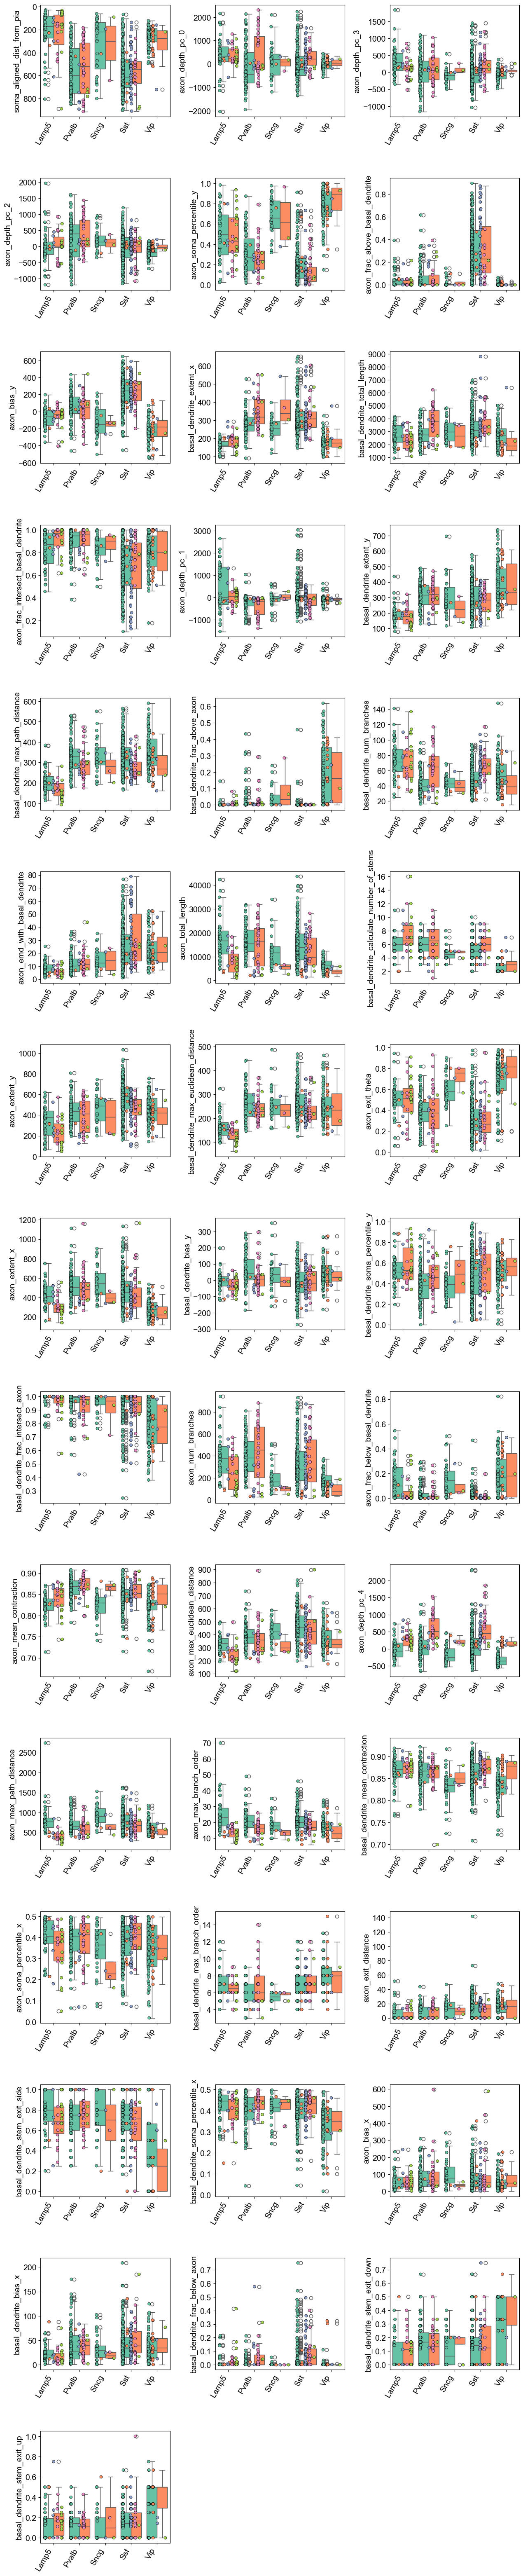

In [56]:
###not used so will likely delete
# plt.figure(figsize = (15,80))
# # plt.figure(figsize = (15,80))
# plt.subplots_adjust(hspace = 0.55)
# plt.subplots_adjust(wspace = 0.35)

# suborder = ["Lamp5", "Pvalb", "Sncg", "Sst", "Vip"]
# hue_order = ['PS', 'EM']
# celltype_order = ['Patch-seq', 'ITC', 'DTC', 'PTC', 'STC']
# # set2_new = {'PS':'#dd93ac',"#6fa8dc", "#5FCE9B"]


# i = 0
# for n in column_list:
#     afont = {'fontname': 'arial'}

#     ax = plt.subplot(15,3, i+1)
#     afont = {'fontname': 'arial'} 
#     sns.boxplot(x= "Subclass", y = n, hue = "Tech_2", data = merge_df, palette = "Set2" , saturation = 1,hue_order = hue_order, order = suborder, ax = ax)
#     sns.stripplot(x= "Subclass", y = n, hue = "cell_type", edgecolor = 'black', linewidth = 0.5, data = merge_df, palette = "Set2" , hue_order = celltype_order, order = suborder, ax = ax, dodge = True)

    
#     ax.set(xlabel=None)
#     ax.set_ylabel(n, fontsize =14, **afont)
  
#     plt.xticks (fontsize =14, rotation = 60, **afont, ha = "right")
#     plt.yticks (fontsize =14, **afont, visible = True)
#     ax.get_legend().remove()

# #     plt.legend(title='', loc='upper right', labels=['Patch-seq', 'EM', 'Curated'])
# #     sns.move_legend(ax)
#     leg = ax.get_legend()
# #     leg.legendHandles[1].set_color('#fc8d62')
# #     leg.legend_handles[1].set_color('#fc8d62')
#     if 'soma_aligned_dist_from_pia' in n:
#         plt.gca().invert_yaxis()
#     i = i+1
# # plt.savefig('Sst_PatchvsEM_MET_types_boxsplot_050724_24files_skelkeys_wis0_100_312_sst_rbreorder_477_158pt1of3.png', bbox_inches = 'tight',  facecolor='w')
# #     plt.close()